In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy
import csv

from scipy.stats import pearsonr


## Calculer la corrélation
La corrélation permet de vérifier que les données corrèlent. 

Pearson's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_i - a_\mu\right)\left(b_i - b_\mu\right)}{\sigma_a \sigma_b}$$

Spearman's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_{i,rank} - a_{\mu,rank}\right)\left(b_{i,rank} - b_{\mu,rank}\right)}{\sigma_{a,rank} \sigma_{b,rank}}$$

Calculer la corrélation entre la longeur des commentaires et la colère.
Théorie = plus la longueur du commentaire et longue plus c'est colère

In [51]:
df = pd.read_csv("../data/clean/commentaires.csv")

df["longueur"] = df["text"].apply(lambda x: len(x.split()))

moyenne_longueurs = df["longueur"].mean()

print("La moyenne de la longueur des commentaires dans le fichier CSV est de :", moyenne_longueurs)

La moyenne de la longueur des commentaires dans le fichier CSV est de :  20.985714285714284


In [52]:
longueurs_sup_moyenne = df[df["longueur"] > moyenne_longueurs]["longueur"]

colere = df[df["label"] == 3]["longueur"]

longueur_min = min(len(longueurs_sup_moyenne), len(colere))
longueurs_sup_moyenne = longueurs_sup_moyenne.head(longueur_min)
colere = colere.head(longueur_min)

correlation, p_value = pearsonr(longueurs_sup_moyenne, colere)

print("La corrélation entre les longueurs supérieures à la moyenne et la colère :", correlation)
print("La p-value de la corrélation est de :", p_value)


La corrélation entre les longueurs supérieures à la moyenne et la colère : 0.5940042238336599
La p-value de la corrélation est de : 0.019549093486360736


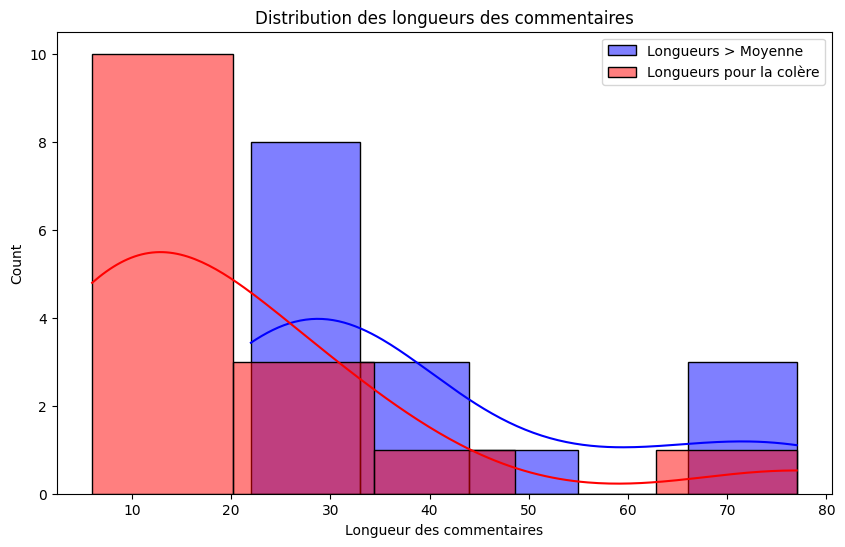

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(longueurs_sup_moyenne, color="blue", label="Longueurs > Moyenne", kde=True)
sns.histplot(colere, color="red", label="Longueurs pour la colère", kde=True)
plt.title("Distribution des longueurs des commentaires")
plt.xlabel("Longueur des commentaires")
plt.legend()
plt.show()

## Le train test split
azqesrtdyuiojpk^lkjhgxfdsq